<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Portfolio-Exercise:-Starbucks" data-toc-modified-id="Portfolio-Exercise:-Starbucks-1">Portfolio Exercise: Starbucks</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Background-Information" data-toc-modified-id="Background-Information-1.0.1">Background Information</a></span></li><li><span><a href="#Optimization-Strategy" data-toc-modified-id="Optimization-Strategy-1.0.2">Optimization Strategy</a></span></li><li><span><a href="#How-To-Test-Your-Strategy?" data-toc-modified-id="How-To-Test-Your-Strategy?-1.0.3">How To Test Your Strategy?</a></span></li></ul></li><li><span><a href="#Strategy" data-toc-modified-id="Strategy-1.1">Strategy</a></span></li><li><span><a href="#Features" data-toc-modified-id="Features-1.2">Features</a></span></li><li><span><a href="#Approach" data-toc-modified-id="Approach-1.3">Approach</a></span></li><li><span><a href="#Classification-Models" data-toc-modified-id="Classification-Models-1.4">Classification Models</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.4.1">Preprocessing</a></span></li><li><span><a href="#Prediction-model---Predicting-Customers-in-the-Target-Group" data-toc-modified-id="Prediction-model---Predicting-Customers-in-the-Target-Group-1.4.2">Prediction model - Predicting Customers in the Target Group</a></span></li><li><span><a href="#Assessing-Performance-of-the-Classifier" data-toc-modified-id="Assessing-Performance-of-the-Classifier-1.4.3">Assessing Performance of the Classifier</a></span></li><li><span><a href="#Conclusion-and-Next-Steps" data-toc-modified-id="Conclusion-and-Next-Steps-1.4.4">Conclusion and Next Steps</a></span></li></ul></li><li><span><a href="#Alternative-Approach---Not-Implemented" data-toc-modified-id="Alternative-Approach---Not-Implemented-1.5">Alternative Approach - Not Implemented</a></span></li></ul></li></ul></div>

## Portfolio Exercise: Starbucks
<br>

<img src="https://opj.ca/wp-content/uploads/2018/02/New-Starbucks-Logo-1200x969.jpg" width="200" height="200">
<br>
<br>
 
#### Background Information

The dataset you will be provided in this portfolio exercise was originally used as a take-home assignment provided by Starbucks for their job candidates. The data for this exercise consists of about 120,000 data points split in a 2:1 ratio among training and test files. In the experiment simulated by the data, an advertising promotion was tested to see if it would bring more customers to purchase a specific product priced at $10. Since it costs the company 0.15 to send out each promotion, it would be best to limit that promotion only to those that are most receptive to the promotion. Each data point includes one column indicating whether or not an individual was sent a promotion for the product, and one column indicating whether or not that individual eventually purchased that product. Each individual also has seven additional features associated with them, which are provided abstractly as V1-V7.

#### Optimization Strategy

Your task is to use the training data to understand what patterns in V1-V7 to indicate that a promotion should be provided to a user. Specifically, your goal is to maximize the following metrics:

* **Incremental Response Rate (IRR)** 

IRR depicts how many more customers purchased the product with the promotion, as compared to if they didn't receive the promotion. Mathematically, it's the ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group (_treatment_) minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group (_control_).

$$ IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}} $$


* **Net Incremental Revenue (NIR)**

NIR depicts how much is made (or lost) by sending out the promotion. Mathematically, this is 10 times the total number of purchasers that received the promotion minus 0.15 times the number of promotions sent out, minus 10 times the number of purchasers who were not given the promotion.

$$ NIR = (10\cdot purch_{treat} - 0.15 \cdot cust_{treat}) - 10 \cdot purch_{ctrl}$$

For a full description of what Starbucks provides to candidates see the [instructions available here](https://drive.google.com/open?id=18klca9Sef1Rs6q8DW4l7o349r8B70qXM).

Below you can find the training data provided.  Explore the data and different optimization strategies.

#### How To Test Your Strategy?

When you feel like you have an optimization strategy, complete the `promotion_strategy` function to pass to the `test_results` function.  
From past data, we know there are four possible outomes:

Table of actual promotion vs. predicted promotion customers:  

<table>
<tr><th></th><th colspan = '2'>Actual</th></tr>
<tr><th>Predicted</th><th>Yes</th><th>No</th></tr>
<tr><th>Yes</th><td>I</td><td>II</td></tr>
<tr><th>No</th><td>III</td><td>IV</td></tr>
</table>

The metrics are only being compared for the individuals we predict should obtain the promotion – that is, quadrants I and II.  Since the first set of individuals that receive the promotion (in the training set) receive it randomly, we can expect that quadrants I and II will have approximately equivalent participants.  

Comparing quadrant I to II then gives an idea of how well your promotion strategy will work in the future. 

Get started by reading in the data below.  See how each variable or combination of variables along with a promotion influences the chance of purchasing.  When you feel like you have a strategy for who should receive a promotion, test your strategy against the test dataset used in the final `test_results` function.

In [1]:
# load in packages
from itertools import combinations

from test_results import test_results, score
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.svm import SVC
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
# load in the data
train_data = pd.read_csv('./training.csv')
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2


### Strategy
IRR is maximised by maximising the number of purchasers in the treatment group. So we need to find what factors increase the number of purchasers in the treatment group.
In addition, NIR should be maximised and must be positive overall - no strategy that results in a negative NIR can be used because this is equivalent to making a loss.

### Features
V1, V4, V5, V6 and V7 all appear to be ordinal variables with discrete integer values. V2 and V3 are continuous numerical values.

### Approach
One way to approach this is to plot graphs of the distribution of values of each feature in the purchase(treatment), customer(treatment), purchase(control) and customer(control) groups. Then it may become clear if there are any patterns in the data that leads to certain customers making a purchase after receiving the promotion.

In [3]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']
categorical_features = ['V1', 'V4', 'V5', 'V6', 'V7']
numerical_features = ['V2', 'V3']

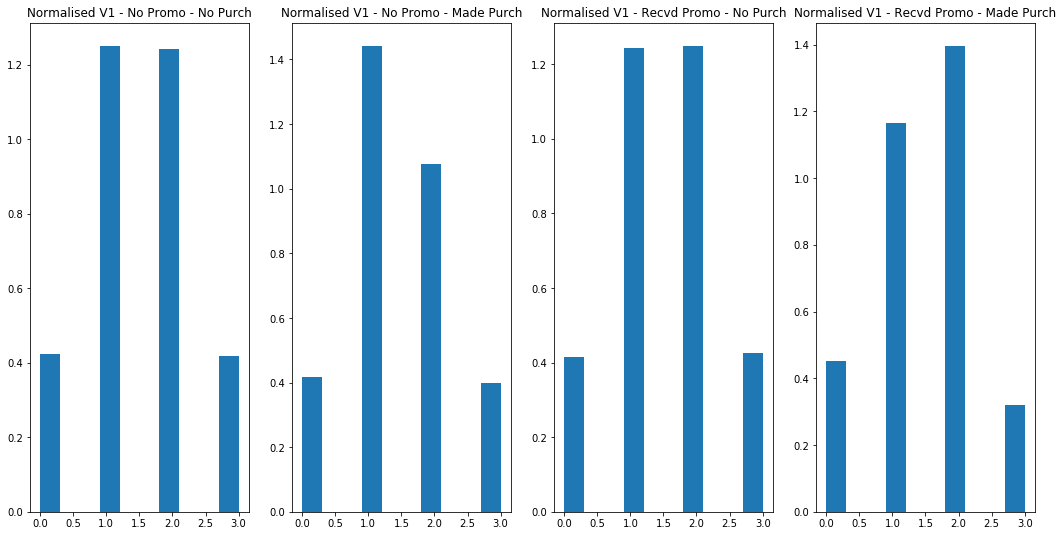

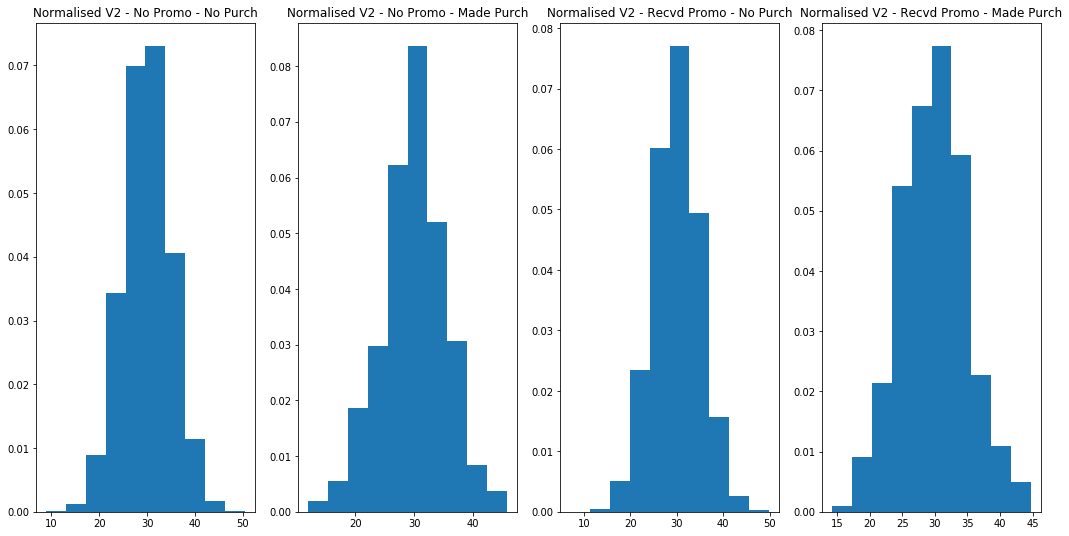

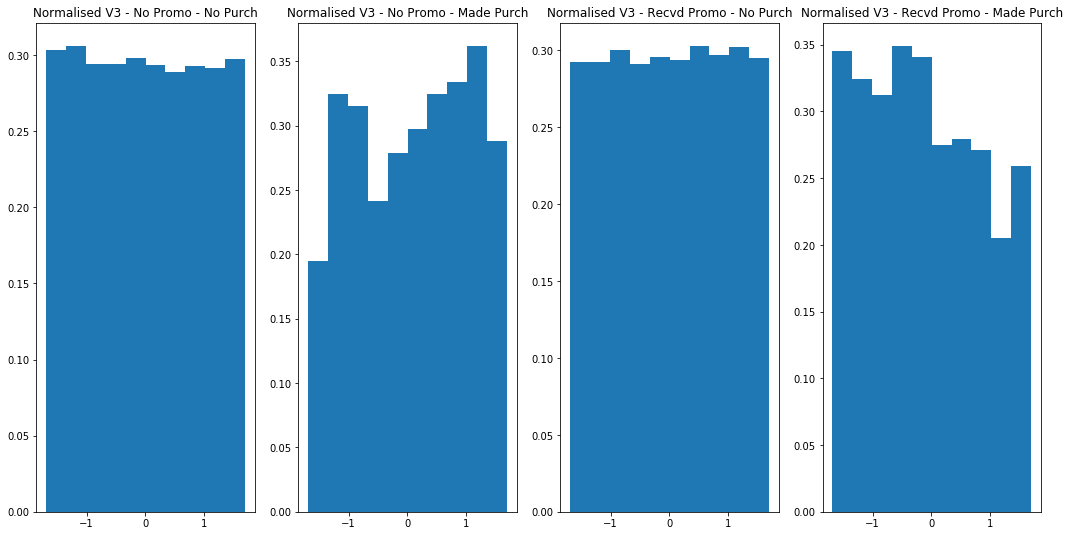

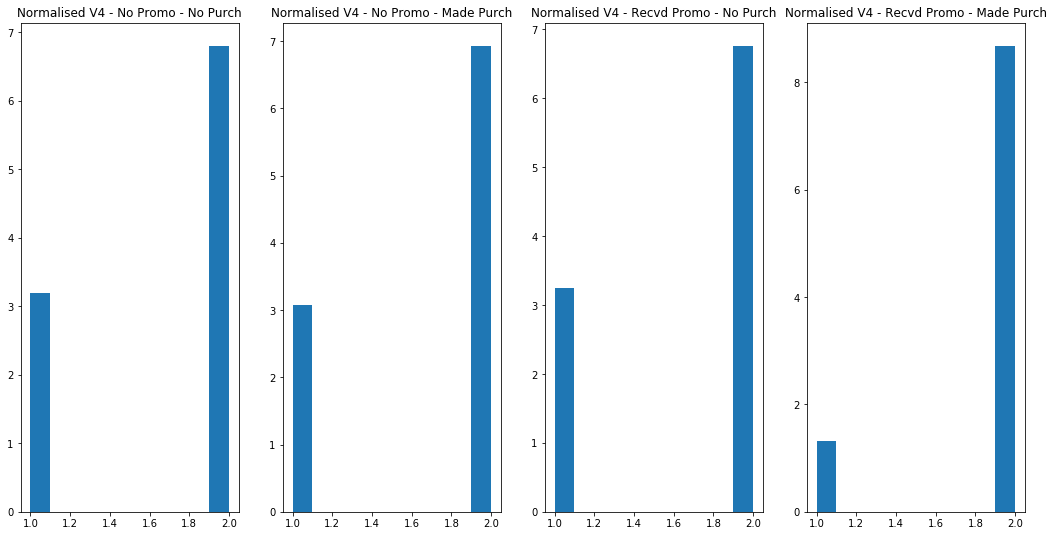

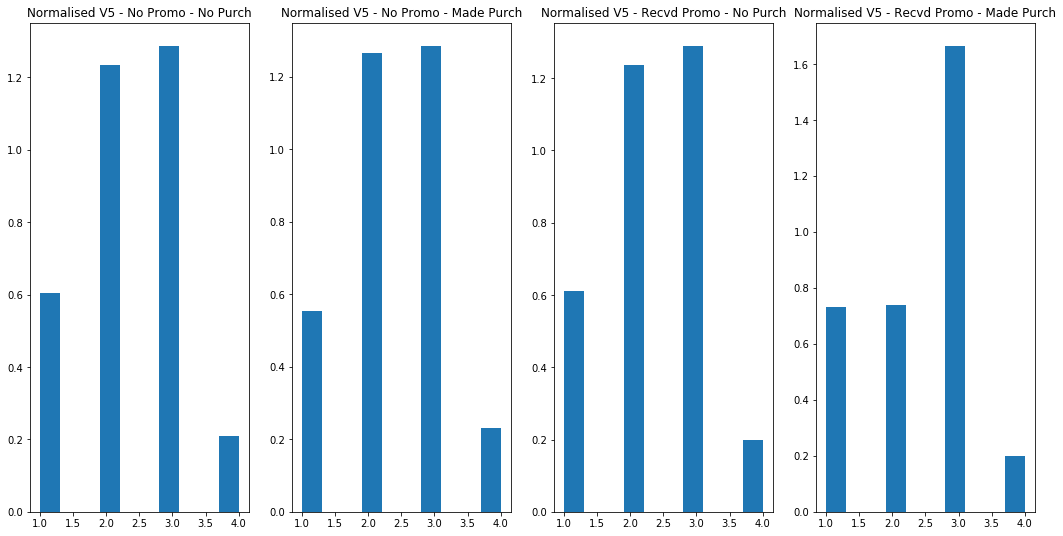

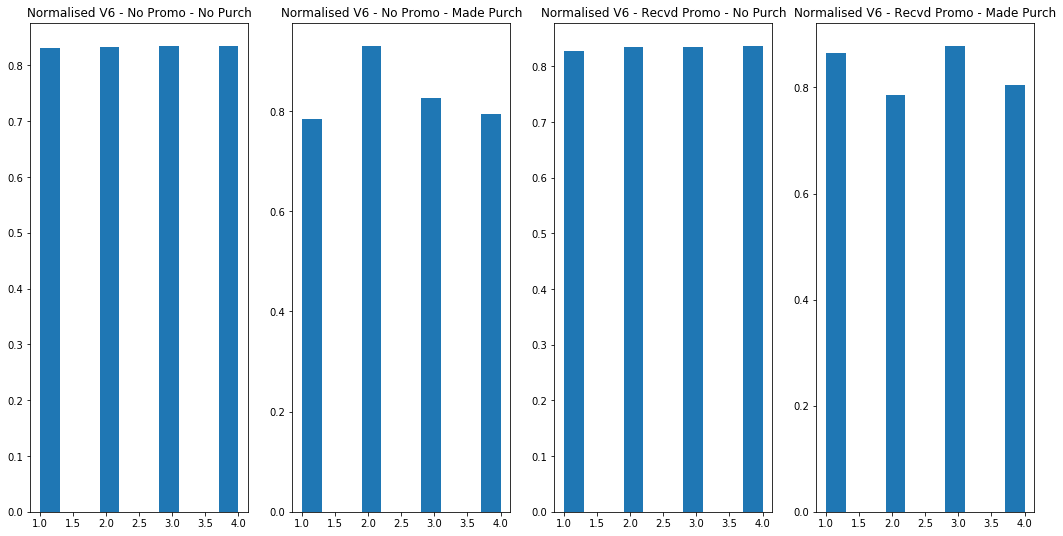

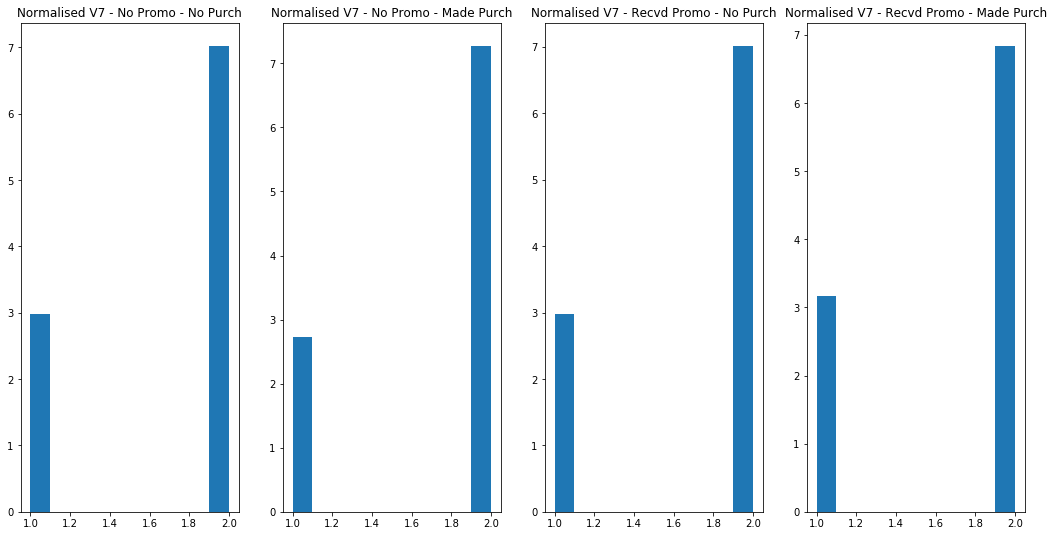

In [4]:
for cat in ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']:
    fig, ax = plt.subplots(1,4, figsize=[18,9])
    ax[0].set_title('Normalised {} - No Promo - No Purch'.format(cat))
    ax[1].set_title('Normalised {} - No Promo - Made Purch'.format(cat))
    ax[2].set_title('Normalised {} - Recvd Promo - No Purch'.format(cat))
    ax[3].set_title('Normalised {} - Recvd Promo - Made Purch'.format(cat))
    ax[0].hist(train_data[(train_data['Promotion'] == 'No') & (train_data['purchase'] == 0)][cat], density=True)
    ax[1].hist(train_data[(train_data['Promotion'] == 'No') & (train_data['purchase'] == 1)][cat], density=True)
    ax[2].hist(train_data[(train_data['Promotion'] == 'Yes') & (train_data['purchase'] == 0)][cat], density=True)
    ax[3].hist(train_data[(train_data['Promotion'] == 'Yes') & (train_data['purchase'] == 1)][cat], density=True)

The histograms above show that for at least some of the features V1-V7, the distribution of values does vary between the four groups of customers. Without discussing further in detail yet - this does suggest that factors V1-V7 do have an influence over which customers in both the control and treatment groups are likely to make a purchase.

### Classification Models
The target group for the promotion is customers who received the promotion and made a purchase. Customers who made a purchase without receiving the promotion are not in the target group - they would have made a purchase anyway. We will create a new feature to indicate this target group and create a classification model to predict which customers are in the target group and should therefore receive the promotion.

#### Preprocessing

In [5]:
# Scale the continuous numerical data
scaler = StandardScaler()
data_scaled = pd.DataFrame(data = train_data.drop(columns='ID'))
scaling_model = scaler.fit(train_data[numerical_features])
data_scaled[numerical_features] = scaling_model.transform(train_data[numerical_features])

In [6]:
data_scaled.head()

,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,No,0,2,0.093785,-1.164716,1,1,3,2
1,No,0,3,0.436226,-0.645498,2,3,2,2
2,No,0,2,0.091418,0.133329,1,1,4,2
3,No,0,0,-0.675506,-0.212816,2,1,4,2
4,Yes,0,3,-0.385038,-0.385889,1,1,2,2


Change the Promotion feature to a numerical value.

In [7]:
data_scaled['Promotion'] = data_scaled['Promotion'].str.replace('No', '0')
data_scaled['Promotion'] = pd.to_numeric(data_scaled['Promotion'].str.replace('Yes', '1'))

Now create the output label to indicate which customers are in the promotion target group.

In [8]:
targets = data_scaled['Promotion'] & data_scaled['purchase']

One-hot encode categorical features.

In [9]:
# One-hot encode categorical features
data_one_hot = pd.get_dummies(data_scaled, columns=categorical_features)
data_one_hot.head()

,Promotion,purchase,V2,V3,V1_0,V1_1,V1_2,V1_3,V4_1,V4_2,V5_1,V5_2,V5_3,V5_4,V6_1,V6_2,V6_3,V6_4,V7_1,V7_2
0,0,0,0.093785,-1.164716,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1
1,0,0,0.436226,-0.645498,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
2,0,0,0.091418,0.133329,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1
3,0,0,-0.675506,-0.212816,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1
4,1,0,-0.385038,-0.385889,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1


Drop the purchase and Promotion features, since they are no longer useful.

In [10]:
data_clean = data_one_hot.drop(columns=['purchase', 'Promotion'])
data_clean.head()

,V2,V3,V1_0,V1_1,V1_2,V1_3,V4_1,V4_2,V5_1,V5_2,V5_3,V5_4,V6_1,V6_2,V6_3,V6_4,V7_1,V7_2
0,0.093785,-1.164716,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1
1,0.436226,-0.645498,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
2,0.091418,0.133329,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1
3,-0.675506,-0.212816,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1
4,-0.385038,-0.385889,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1


In [11]:
# Split both data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data_clean, 
    targets,
    random_state = 42,
    stratify=targets)

#### Prediction model - Predicting Customers in the Target Group

In [12]:
# Classifier to predict purchases in the treatment group (with promotion)
#clf_treatment = AdaBoostClassifier(n_estimators=1000, learning_rate=1.95, random_state=0)
clf = xgb.XGBClassifier(random_state=0)
#clf_treatment = SVC(kernel='sigmoid', random_state=0)
#clf_treatment = LogisticRegression(solver='liblinear', max_iter=1000, random_state=0)
#clf_treatment.fit(X_treatment_train, y_treatment_train)

In [13]:
parameters = {'n_estimators': [100, 500, 1000],
              'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

#parameters = {'n_estimators': [80, 100, 120, 140, 200], 
#              'max_depth': [6, 7, 8], 'learning_rate': [1.8, 2, 2.2]}

#parameters = {'n_estimators': [100, 200, 500, 1000, 2000, 5000], 
#              'max_depth': [3, 4, 5, 6, 7, 8], 'learning_rate': [0.01, 0.1, 0.5, 1, 1.5, 2]}

# Make an fbeta_score scoring object using make_scorer().
scorer = make_scorer(fbeta_score, beta=1)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_fit.best_estimator_
# Predict on test data
predictions = clf.predict(X_test)

/home/matt/anaconda3/envs/clustering/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/matt/anaconda3/envs/clustering/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Assessing Performance of the Classifier

In [14]:
fbeta_score(y_test, predictions, beta=1)

0.0

In [15]:
confusion_matrix(y_test, predictions)

array([[20954,     0],
       [  180,     0]])

In [16]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20954
           1       0.00      0.00      0.00       180

    accuracy                           0.99     21134
   macro avg       0.50      0.50      0.50     21134
weighted avg       0.98      0.99      0.99     21134



/home/matt/anaconda3/envs/clustering/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=2.3, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### Conclusion and Next Steps
The classifier is not currently working well. However the steps to implement a working strategy can be completed in the function below for when it does work.
Now the preprocessing steps and the trained classification model can be applied to the unseen data.

In [18]:
def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]
                
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''
    
    # Scale the numerical features using the scaling model created on the training data
    df_scaled = df
    df_scaled[numerical_features] = scaling_model.transform(df[numerical_features])
    # One-hot encode categorical features
    df_one_hot = pd.get_dummies(df_scaled, columns=categorical_features)

    # Predict which customers will make a purchase on receiving a promotion
    predicted_targets = clf.predict(df_one_hot)
    promotion = ['Yes' if predicted_targets[i] else 'No' for i in range(len(predicted_targets))]
    
    return promotion

In [19]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is nan.

Your nir with this strategy is 0.00.
We came up with a model with an irr of 0.0188 and an nir of 189.45 on the test set.

 How did you do?


/home/matt/anaconda3/envs/clustering/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matt/anaconda3/envs/clustering/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/data/learning/mooc/datascience/course/10-ExperimentalDesignAndRecommendations/exercises/test_results.py:9: RuntimeWarning: invalid value encountered in long_scalars
  irr = n_treat_purch / n_treat - n_ctrl_purch / n_con

(nan, 0.0)

### Alternative Approach - Not Implemented
Another approach would be to perform k-means clustering on all the customers who received the promotion, then perform the same clustering on customers who received the promotion and made a purchase. Then we could see if the purchase(treatment) group are particularly over-represented in one cluster or another.